In [1]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from imgaug import augmenters as iaa

In [2]:
def load_mnist(kind='train'):
    with open('data/mnist/%s-labels.idx1-ubyte' % kind, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype = np.uint8)
    with open('data/mnist/%s-images.idx3-ubyte' % kind, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype = np.uint8).reshape(len(labels), 784)
    return images, labels

In [3]:
X_train, Y_train = load_mnist()
X_train = X_train.reshape(-1, 28, 28)

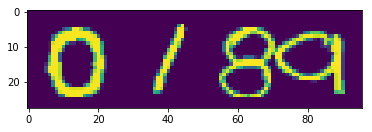

In [154]:
num_digits = np.random.randint(8) + 1
img = X_train[np.random.randint(X_train.shape[0])]
for _ in range(num_digits-1):
    gap = np.random.randint(1,12)
    rand = np.random.rand()
    next_img = np.random.randint(X_train.shape[0])
    img = np.concatenate((img[:, :-gap], img[:, -gap:] + X_train[next_img][:, :gap], X_train[next_img][:, gap:]), axis=1)
    '''if rand < 0.333:
        img = np.concatenate((img[:, :-gap], X_train[next_img]), axis=1)
    elif rand > 0.667:
        img = np.concatenate((img, X_train[next_img][:, gap:]), axis=1)
    else :
        img = np.concatenate((img, np.zeros((img.shape[0], gap)), X_train[next_img]), axis=1)'''
plt.imshow(img)        

In [6]:
img = plt.imread('data/symbol/+_1.png')

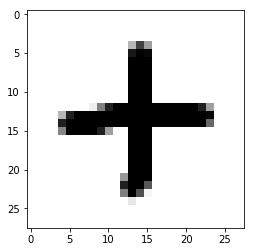

In [7]:
plt.imshow(img)

In [4]:
def prepro(o,image_size=[28,28]):
    """
    Call this function to preprocess RGB image to grayscale image if necessary
    This preprocessing code is from
        https://github.com/hiwonjoon/tf-a3c-gpu/blob/master/async_agent.py
    
    Input: 
    RGB image: np.array
    Default return: np.array 
        Grayscale image, shape: (28, 28)
    
    """
    y = 0.2126 * o[:, :, :, 0] + 0.7152 * o[:, :, :, 1] + 0.0722 * o[:, :, :, 2]
    resized = np.array([scipy.misc.imresize(img, image_size) for img in y])
    resized = (255-resized).astype(np.uint8)
    return resized
    #return np.expand_dims(resized.astype(np.float32),axis=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


TypeError: Invalid dimensions for image data

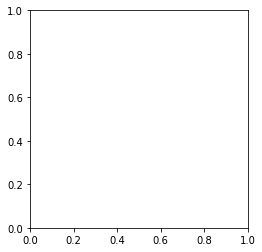

In [9]:
plt.imshow((prepro(img)))

In [54]:
seq = iaa.Sequential([
    #iaa.Crop(px=(0, 4)), # crop images from each side by 0 to 4px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.Flipud(0.5), 
    iaa.GaussianBlur(sigma=(0, 0.5)), # blur images with a sigma of 0 to 0.5
    iaa.PerspectiveTransform(scale=(0.05, 0.1)) # advanced crop
])
#images_aug = seq.augment_images(np.array([prepro(img)]))
#plt.imshow(images_aug.reshape(28, 28))

In [60]:
imgs = []
for i in range(1, 11):
    imgs.append(plt.imread('data/symbol/+_%d.png'%(i)))

In [61]:
imgs = prepro(np.array(imgs * 250))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


In [62]:
images_aug = seq.augment_images(imgs)

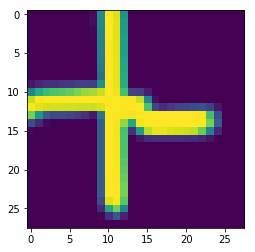

In [94]:
index = np.random.randint(len(images_aug))
plt.imshow(images_aug[index])

In [5]:
def generate_symbol_dataset():
    """

    """
    images = []
    labels = [] # 0: +, 1: -, 2: *, 3: /

    # data augmenter
    seq = iaa.Sequential([
        #iaa.Crop(px=(0, 4)), # crop images from each side by 0 to 4px (randomly chosen)
        iaa.Fliplr(0.5), # horizontally flip 50% of the images
        iaa.Flipud(0.5), 
        iaa.GaussianBlur(sigma=(0, 0.5)), # blur images with a sigma of 0 to 0.5
        iaa.PerspectiveTransform(scale=(0.05, 0.1)) # advanced crop
    ])

    symbols = ['+', '-', 'x', 'd']
    for j in range(len(symbols)):
        # read origin symbol handwriting (10 imgs per symbol)
        imgs = []
        for i in range(1, 11):
            imgs.append(plt.imread('data/symbol/%s_%d.png'%(symbols[j], i)))
        # data augment part
        imgs = prepro(np.array(imgs * 250))
        images_aug = seq.augment_images(imgs)
        # gather data part
        images.append(images_aug)
        labels.append([[j]] * 2500)

    images = np.vstack(images)
    labels = np.vstack(labels)

    # shuffle part
    shuffle_index = np.random.choice(len(images), size=len(images), replace=False)
    images = images[shuffle_index]
    labels = labels[shuffle_index]

    return images, labels

In [6]:
images, labels = generate_symbol_dataset()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


[0]


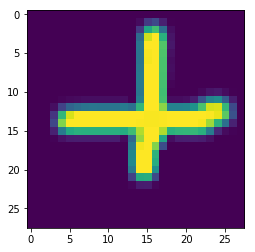

In [8]:
index = np.random.randint(len(images))
plt.imshow(images[index])
print(labels[index])

In [7]:
from data_generation import generate_equation

In [8]:
img, label = generate_equation(X_train, Y_train, images, labels)

[9, 4, 1, 2, 9, 4, 9, '/', 4, 1, 3, 1, 7, 5]


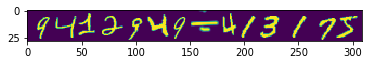

In [9]:
plt.imshow(img)
print(label)

In [11]:
import pickle

In [ ]:
plt.im

In [15]:
help(pickle.pack)

Help on built-in function pack in module _struct:

pack(...)
    pack(fmt, v1, v2, ...) -> bytes
    
    Return a bytes object containing the values v1, v2, ... packed according
    to the format string fmt.  See help(struct) for more on format strings.

